In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

#file id
file_id = "1x5JazhkTGSaf_FUlqftOLVnGC6cxgRaY"

# url file
url = f"https://drive.google.com/uc?id={file_id}"

# Baca file Excel
df = pd.read_excel(url)

# Tampilkan data
print(df.columns)


Mounted at /content/drive
Index(['tweet', 'label'], dtype='object')


In [2]:
df

,tweet,label
0,"""@ch_chotimah2 @prabowo Bismillah..nitip mba h...",0
1,"""Biar gak asal nuduh hoax agar kt gak kliatan ...",2
2,"""@speedup2227 @susipudjiastuti @jokowi @Listyo...",0
3,"""@FaGtng @AgusYudhoyono @jokowi @prabowo Beda ...",0
4,"""@H4T14K4LN4L42 @jokowi @prabowo TERKUTUKLAH W...",2
...,...,...
2188,""" Budaya arab ya? Quote #fufufafa --- Nyambung...",0
2189,"""i actually dislike this ngemtot girl but okay...",2
2190,"""edit ini ditempel si fufufafa""",0
2191,"""MILK EXPERT bicara... Kesana kemari bagi2 Sus...",2


In [3]:
print(df.isnull().sum())

tweet    0
label    0
dtype: int64


In [4]:
label_counts = df['label'].value_counts()
print(label_counts)

label
2    1025
0     657
1     511
Name: count, dtype: int64


<ipython-input-5-8c1afa11306c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  xyz = sns.countplot(x='label', data=df, palette='Set2')
<ipython-input-5-8c1afa11306c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  xyz.set_xticklabels(['Netral', 'Positif', 'Negatif'])


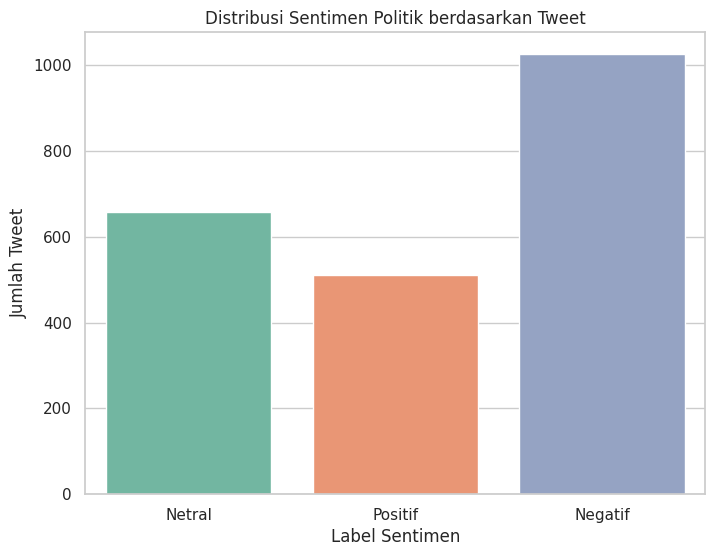

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# membuat distribusi sentimen politik berdasarkan jumlah tweet
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# membuat countplot untuk distribusi sentimen politik
xyz = sns.countplot(x='label', data=df, palette='Set2')

# mengubah label x-axis untuk menampilkan kategori yang sesuai
xyz.set_xticklabels(['Netral', 'Positif', 'Negatif'])

# menambahkan judul dan label
plt.title('Distribusi Sentimen Politik berdasarkan Tweet')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Tweet')

# menampilkan plot
plt.show()

In [6]:
# Hapus username (@username)
df["tweet"] = df["tweet"].str.replace(r'@\w+\s', '', regex=True)

# Hapus 'dom' dan teks setelahnya
df["tweet"] = df["tweet"].str.replace(r'\bdom\b.*', '', case=False, regex=True)

# Hapus URL
df["tweet"] = df["tweet"].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

# Hapus simbol dan karakter khusus
df["tweet"] = df["tweet"].str.replace(r'[^\w\s]', '', regex=True)

# Hapus angka
df["tweet"] = df["tweet"].str.replace(r'[0-9]', '', regex=True)


In [7]:
# normalization

# Membaca kamus normalisasi dari file Excel
normalized_dict = pd.read_excel("kamuskatabaku.xlsx")

# Buat dictionary dari kamus normalisasi
slang_to_formal = dict(zip(normalized_dict['slang'], normalized_dict['formal']))

# Fungsi untuk normalisasi berdasarkan kamus
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_to_formal.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom tweet
df['tweet'] = df['tweet'].apply(normalize_text)

df

,tweet,label
0,Bismillahnitip mbak,0
1,Biar enggak asal menuduh hoax agar kita enggak...,2
2,Mohon menunggu dengan senang hati kami balas m...,0
3,Beda dengan yang ini ketika sudah waras,0
4,TERKUTUKLAH WAHAI KAU LAKNAT,2
...,...,...
2188,Budaya arab ya Quote fufufafa Nyambungnya dari...,0
2189,i actually dislike this ngemtot girl but okay ...,2
2190,edit ini ditempel sih fufufafa,0
2191,MILK EXPERT bicara Kesana kemari bagi Susu Ahh...,2


In [8]:
df["tweet"] = df["tweet"].str.lower()

In [9]:
df

,tweet,label
0,bismillahnitip mbak,0
1,biar enggak asal menuduh hoax agar kita enggak...,2
2,mohon menunggu dengan senang hati kami balas m...,0
3,beda dengan yang ini ketika sudah waras,0
4,terkutuklah wahai kau laknat,2
...,...,...
2188,budaya arab ya quote fufufafa nyambungnya dari...,0
2189,i actually dislike this ngemtot girl but okay ...,2
2190,edit ini ditempel sih fufufafa,0
2191,milk expert bicara kesana kemari bagi susu ahh...,2


In [10]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [11]:
# Light Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk light stemming
def light_stem(text):
    return stemmer.stem(text)

# Terapkan light stemming secara langsung
df['tweet'] = df['tweet'].map(light_stem)

# Cek hasil
df

,tweet,label
0,bismillahnitip mbak,0
1,biar enggak asal tuduh hoax agar kita enggak l...,2
2,mohon tunggu dengan senang hati kami balas men...,0
3,beda dengan yang ini ketika sudah waras,0
4,kutuk wahai kau laknat,2
...,...,...
2188,budaya arab ya quote fufufafa nyambungnya dari...,0
2189,i actually dislike this ngemtot girl but okay ...,2
2190,edit ini tempel sih fufufafa,0
2191,milk expert bicara kesana kemari bagi susu ahh...,2


In [12]:
import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Asumsi: dataClean adalah DataFrame pandas
# Buat objek StopWordRemover
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

df["tweet"] = df["tweet"].apply(stopword_remover.remove)
df.head(5)

,tweet,label
0,bismillahnitip mbak,0
1,biar enggak asal tuduh hoax enggak lihat bodok...,2
2,mohon tunggu senang hati balas mention bapakib...,0
3,beda yang ketika waras,0
4,kutuk wahai kau laknat,2


In [13]:
df.to_excel('cleaned_dataset.xlsx', index=False)

In [14]:
df = pd.read_excel('cleaned_dataset.xlsx')

In [15]:
df

,tweet,label
0,bismillahnitip mbak,0
1,biar enggak asal tuduh hoax enggak lihat bodok...,2
2,mohon tunggu senang hati balas mention bapakib...,0
3,beda yang ketika waras,0
4,kutuk wahai kau laknat,2
...,...,...
2188,budaya arab quote fufufafa nyambungnya mana,0
2189,i actually dislike this ngemtot girl but okay ...,2
2190,edit tempel sih fufufafa,0
2191,milk expert bicara kesana kemari susu ahhh sus...,2


In [16]:
import numpy as np

In [17]:
x = df['tweet']
y = df['label']

In [18]:
import numpy as np

# Hapus baris dengan NaN pada kolom 'label' dan 'tweet' saja
df = df.dropna(subset=['label', 'tweet'])

In [19]:
!pip install imbalanced-learn scikit-learn

TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Ganti NaN dengan string kosong
x = ["" if str(text) == 'nan' else text for text in x]

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5, max_df=0.8, stop_words='english')  # ubah 'english' ke 'indonesian' jika data berbahasa Indonesia

# Fit dan transform data pelatihan
TF_IDF_X_train = vectorizer.fit_transform(X_train)

# Tranformasi data pengujian
TF_IDF_X_test = vectorizer.transform(X_test)

# Cek matriks hasil
print(f"TF-IDF train set shape: {TF_IDF_X_train.shape}")
print(f"TF-IDF test set shape: {TF_IDF_X_test.shape}")

# Cek distribusi awal
print(f"Distribusi label sebelum balancing: {Counter(y_train)}")

TF-IDF train set shape: (1754, 1050)
TF-IDF test set shape: (439, 1050)
Distribusi label sebelum balancing: Counter({2: 825, 0: 525, 1: 404})


Naive Bayes Sebelum Balancing (TF-IDF)

In [21]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ==================
# Evaluasi Sebelum Balancing
# ==================
print("\n=== Evaluasi Sebelum Balancing ===")

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(TF_IDF_X_train, y_train)

print("Best parameters:", grid_search.best_params_)
nb_model = grid_search.best_estimator_
nb_model.fit(TF_IDF_X_train, y_train)

# Prediksi dan evaluasi pada test set
y_pred_before = nb_model.predict(TF_IDF_X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Akurasi sebelum balancing: {accuracy_before * 100:.2f}%")
print("\nClassification Report Sebelum Balancing:")
print(classification_report(y_test, y_pred_before))

report = classification_report(y_test, y_pred_before, output_dict=True)

macro_precision = report['macro avg']['precision'] * 100
macro_recall = report['macro avg']['recall'] * 100
macro_f1_score = report['macro avg']['f1-score'] * 100

print("\nAkumulasi (Macro Average):")
print(f"  Precision: {macro_precision:.2f}%")
print(f"  Recall:    {macro_recall:.2f}%")
print(f"  F1-Score:  {macro_f1_score:.2f}%")



=== Evaluasi Sebelum Balancing ===
Best parameters: {'alpha': 10.0}
Akurasi sebelum balancing: 60.82%

Classification Report Sebelum Balancing:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       132
           1       0.63      0.63      0.63       107
           2       0.60      0.70      0.65       200

    accuracy                           0.61       439
   macro avg       0.61      0.59      0.60       439
weighted avg       0.61      0.61      0.60       439


Akumulasi (Macro Average):
  Precision: 61.22%
  Recall:    59.36%
  F1-Score:  59.77%


Balancing SMOTE (TF-IDF)


=== Balancing Dataset dengan SMOTE ===
Distribusi label setelah balancing: Counter({2: 825, 0: 825, 1: 825})


<ipython-input-22-f4bf432fc85a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_balanced_text, y=values_balanced, palette='viridis')


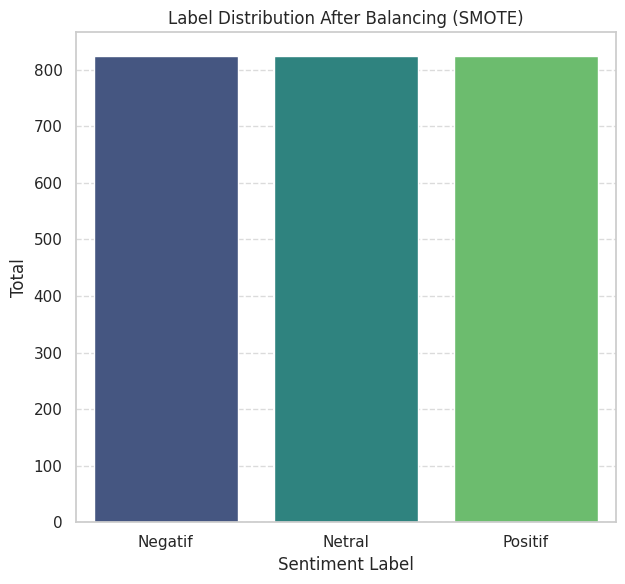

In [22]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

label_mapping = {0: 'Netral', 1: 'Positif', 2: 'Negatif'}

# ==================
# SMOTE Balancing
# ==================
print("\n=== Balancing Dataset dengan SMOTE ===")
smote = SMOTE(k_neighbors=5, sampling_strategy='auto', random_state=12)
#undersampler = RandomOverSampler(random_state=12)
TF_IDF_X_train_balanced, y_train_balanced = smote.fit_resample(TF_IDF_X_train, y_train)

# Cek distribusi setelah balancing
print(f"Distribusi label setelah balancing: {Counter(y_train_balanced)}")

# Visualisasi distribusi label sebelum balancing
plt.figure(figsize=(12, 6))

# Konversi label angka ke teks untuk visualisasi
labels_balanced_text = [label_mapping[label] for label in Counter(y_train_balanced).keys()]
values_balanced = list(Counter(y_train_balanced).values())

# Setelah balancing
plt.subplot(1, 2, 2)
sns.barplot(x=labels_balanced_text, y=values_balanced, palette='viridis')
plt.title('Label Distribution After Balancing (SMOTE)')
plt.xlabel('Sentiment Label')
plt.ylabel('Total')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

Naive Bayes Setelah Balancing (TF-IDF)

In [23]:
# ==================
# Evaluasi Setelah Balancing
# ==================
print("\n=== Evaluasi Setelah Balancing ===")

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(TF_IDF_X_train, y_train)

print("Best parameters:", grid_search.best_params_)
nb_model_balanced = grid_search.best_estimator_
nb_model_balanced.fit(TF_IDF_X_train_balanced, y_train_balanced)

# Prediksi dan evaluasi pada test set
y_pred_after = nb_model_balanced.predict(TF_IDF_X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(f"Akurasi setelah balancing: {accuracy_after * 100:.2f}%")
print("\nClassification Report Setelah Balancing:")
print(classification_report(y_test, y_pred_after))

report = classification_report(y_test, y_pred_before, output_dict=True)

macro_precision = report['macro avg']['precision'] * 100
macro_recall = report['macro avg']['recall'] * 100
macro_f1_score = report['macro avg']['f1-score'] * 100

print("\nAkumulasi (Macro Average):")
print(f"  Precision: {macro_precision:.2f}%")
print(f"  Recall:    {macro_recall:.2f}%")
print(f"  F1-Score:  {macro_f1_score:.2f}%")


=== Evaluasi Setelah Balancing ===
Best parameters: {'alpha': 10.0}
Akurasi setelah balancing: 59.91%

Classification Report Setelah Balancing:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       132
           1       0.58      0.67      0.62       107
           2       0.64      0.61      0.63       200

    accuracy                           0.60       439
   macro avg       0.59      0.60      0.59       439
weighted avg       0.60      0.60      0.60       439


Akumulasi (Macro Average):
  Precision: 61.22%
  Recall:    59.36%
  F1-Score:  59.77%


SVM Sebelum Balancing (TF-IDF)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==================
# Evaluasi SVM Sebelum Balancing
# ==================
print("\n=== Evaluasi SVM Sebelum Balancing ===")
svm_model = SVC(kernel='linear', random_state=42)  # Gunakan kernel 'linear', 'poly', atau 'rbf' sesuai kebutuhan
svm_model.fit(TF_IDF_X_train, y_train)

# Prediksi dan evaluasi pada test set
y_pred_svm_before = svm_model.predict(TF_IDF_X_test)
svm_accuracy_before = accuracy_score(y_test, y_pred_svm_before)
svm_confusion_matrix_before = confusion_matrix(y_test, y_pred_svm_before)

print(f"SVM Model Accuracy Sebelum Balancing: {svm_accuracy_before* 100:.2f}%")
print("\nSVM Classification Report Sebelum Balancing:")
print(classification_report(y_test, y_pred_svm_before))

report = classification_report(y_test, y_pred_svm_before, output_dict=True)

macro_precision = report['macro avg']['precision'] * 100
macro_recall = report['macro avg']['recall'] * 100
macro_f1_score = report['macro avg']['f1-score'] * 100

print("\nAkumulasi (Macro Average):")
print(f"  Precision: {macro_precision:.2f}%")
print(f"  Recall:    {macro_recall:.2f}%")
print(f"  F1-Score:  {macro_f1_score:.2f}%")



=== Evaluasi SVM Sebelum Balancing ===
SVM Model Accuracy Sebelum Balancing: 62.19%

SVM Classification Report Sebelum Balancing:
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       132
           1       0.68      0.59      0.63       107
           2       0.64      0.69      0.66       200

    accuracy                           0.62       439
   macro avg       0.62      0.61      0.61       439
weighted avg       0.62      0.62      0.62       439


Akumulasi (Macro Average):
  Precision: 62.38%
  Recall:    60.81%
  F1-Score:  61.45%


SVM Setelah Balancing (TF-IDF)

In [25]:
# ==================
# Evaluasi SVM Setelah Balancing
# ==================
print("\n=== Evaluasi SVM Setelah Balancing ===")
svm_model_balanced = SVC(kernel='linear', random_state=42)
svm_model_balanced.fit(TF_IDF_X_train_balanced, y_train_balanced)

# Prediksi dan evaluasi pada test set
y_pred_svm_after = svm_model_balanced.predict(TF_IDF_X_test)
svm_accuracy_after = accuracy_score(y_test, y_pred_svm_after)
svm_confusion_matrix_after = confusion_matrix(y_test, y_pred_svm_after)

print(f"SVM Model Accuracy Setelah Balancing: {svm_accuracy_after* 100:.2f}%")
print("\nSVM Classification Report Setelah Balancing:")
print(classification_report(y_test, y_pred_svm_after))

report = classification_report(y_test, y_pred_svm_after, output_dict=True)

macro_precision = report['macro avg']['precision'] * 100
macro_recall = report['macro avg']['recall'] * 100
macro_f1_score = report['macro avg']['f1-score'] * 100

print("\nAkumulasi (Macro Average):")
print(f"  Precision: {macro_precision:.2f}%")
print(f"  Recall:    {macro_recall:.2f}%")
print(f"  F1-Score:  {macro_f1_score:.2f}%")



=== Evaluasi SVM Setelah Balancing ===
SVM Model Accuracy Setelah Balancing: 59.68%

SVM Classification Report Setelah Balancing:
              precision    recall  f1-score   support

           0       0.50      0.60      0.54       132
           1       0.63      0.69      0.66       107
           2       0.67      0.55      0.60       200

    accuracy                           0.60       439
   macro avg       0.60      0.61      0.60       439
weighted avg       0.61      0.60      0.60       439


Akumulasi (Macro Average):
  Precision: 59.89%
  Recall:    61.17%
  F1-Score:  60.10%


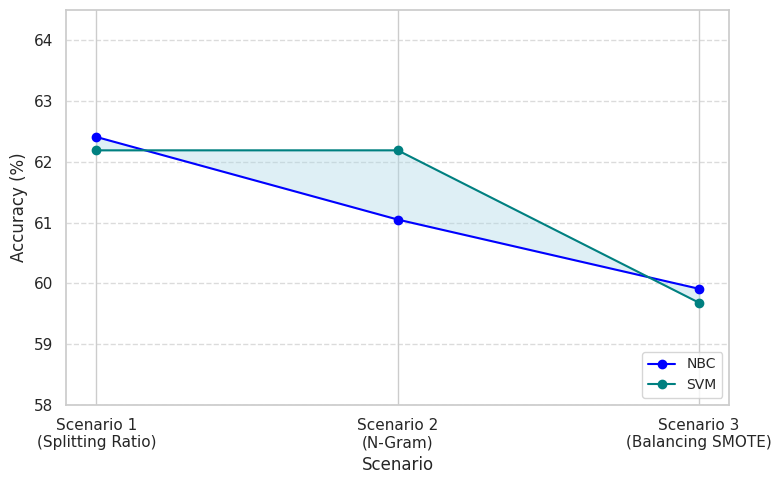

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data Accuracy (%) untuk CNN dan LSTM
scenarios = ['Scenario 1\n(Splitting Ratio)',
             'Scenario 2\n(N-Gram)',
             'Scenario 3\n(Balancing SMOTE)']

#nbc_accuracy = [62.41, 61.05, 61.05]
#svm_accuracy = [62.19, 62.19, 58.77]

nbc_accuracy = [62.41, 61.05, 59.91]
svm_accuracy = [62.19, 62.19, 59.68]

# Plotting grafik
plt.figure(figsize=(8, 5))
plt.plot(scenarios, nbc_accuracy, label='NBC', marker='o', color='blue')
plt.plot(scenarios, svm_accuracy, label='SVM', marker='o', color='teal')
plt.fill_between(scenarios, nbc_accuracy, svm_accuracy, color='lightblue', alpha=0.4)

# Menambahkan label dan judul
plt.xlabel("Scenario", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(58.0, 64.5)

# Menambahkan grid, legenda, dan penyesuaian layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()

# Menampilkan grafik
plt.show()
